# RNA-Seq Read Count

**Created**: 17 January 2022

## Environment

In [20]:
library(tidyverse)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

## Load Data

In [2]:
meta <- read.csv("03_Functional_Interpretation/metadata/reads_calderon_et_al_rna_seq.txt")

In [3]:
head(meta)

,Run,Assay.Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,cell_type,Center.Name,Consent,⋯,LibrarySelection,LibrarySource,lineage,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study,Treatment
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR11007061,RNA-Seq,192,8160479782,PRJNA484735,SAMN09768434,2579781267,CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319750,primary blood,SRP156452,no_treament
2,SRR11007062,RNA-Seq,195,15315982752,PRJNA484735,SAMN09768433,4836924733,CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319751,primary blood,SRP156452,treatment1
3,SRR11007063,RNA-Seq,195,13128598440,PRJNA484735,SAMN09768432,4155236675,Central_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319752,primary blood,SRP156452,no_treament
4,SRR11007064,RNA-Seq,193,4866405615,PRJNA484735,SAMN09768431,1546902050,Central_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319753,primary blood,SRP156452,treatment1
5,SRR11007065,RNA-Seq,195,9601276948,PRJNA484735,SAMN09768430,3023735003,Effector_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319754,primary blood,SRP156452,no_treament
6,SRR11007066,RNA-Seq,196,9273440229,PRJNA484735,SAMN09768429,2953466798,Effector_memory_CD8pos_T,GEO,public,⋯,cDNA,TRANSCRIPTOMIC,CD8,Homo sapiens,ILLUMINA,2020-02-04T00:00:00Z,GSM3319755,primary blood,SRP156452,treatment1


In [5]:
colnames(meta)

[1] "Run"                 "Assay.Type"          "AvgSpotLen"         
 [4] "Bases"               "BioProject"          "BioSample"          
 [7] "Bytes"               "cell_type"           "Center.Name"        
[10] "Consent"             "DATASTORE.filetype"  "DATASTORE.provider" 
[13] "DATASTORE.region"    "donor"               "Experiment"         
[16] "GEO_Accession..exp." "Instrument"          "LibraryLayout"      
[19] "LibrarySelection"    "LibrarySource"       "lineage"            
[22] "Organism"            "Platform"            "ReleaseDate"        
[25] "Sample.Name"         "source_name"         "SRA.Study"          
[28] "Treatment"

## Basic Information about Data

There are 166 RNA-Seq samples from the Calderon *et al.* study.

In [4]:
nrow(meta)

[1] 166

Most samples were run on an Illumina NovaSeq 6000. Some were run on an Illumina HiSeq 4000. All samples runs generated paired-end reads. Samples run on the Illumina NovaSeq 6000 generated 100 bp reads, while samples run on the Illumina HiSeq 4000 generated 76 bp reads.

In [17]:
table(meta$Instrument)
table(meta$LibraryLayout)
table(meta$LibrarySelection)
table(meta$LibrarySource)
table(meta$Platform)


  Illumina HiSeq 4000 Illumina NovaSeq 6000 
                   19                   147 


PAIRED 
   166 


cDNA 
 166 


TRANSCRIPTOMIC 
           166 


ILLUMINA 
     166 

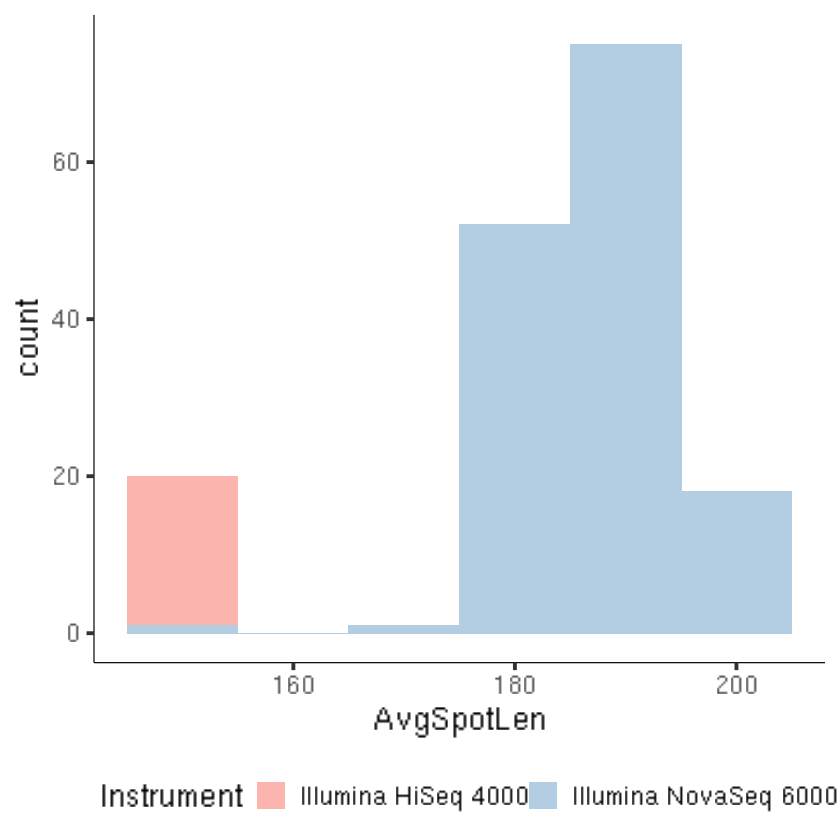

In [22]:
meta %>%
    ggplot() +
    geom_histogram(aes(x=AvgSpotLen, fill=Instrument), binwidth=10) +
    scale_fill_brewer(palette="Pastel1") +
    ggplot_theme

There are 25 different primary cell types. Only 21 of them have enough samples to perform statistical tests.

In [9]:
length(unique(meta$cell_type))
table(meta$cell_type)
sum(table(meta$cell_type) >= 3)

[1] 25


                  Bulk_B                 CD8pos_T  Central_memory_CD8pos_T 
                       7                        8                        7 
       Effector_CD4pos_T Effector_memory_CD8pos_T      Follicular_T_Helper 
                       8                        8                        8 
           Gamma_delta_T              Immature_NK                Mature_NK 
                       7                        1                       10 
                   Mem_B                Memory_NK             Memory_Teffs 
                       7                        1                        8 
            Memory_Tregs                Monocytes              Myeloid_DCs 
                       7                       12                        3 
                 Naive_B              Naive_CD8_T              Naive_Teffs 
                       8                        8                       10 
             Naive_Tregs                     pDCs             Plasmablasts 
           

[1] 21

These 25 cell types belong to 6 broad cell lineages. Most samples come from CD4 T cells, followed by CD8 T Cells.

In [11]:
length(unique(meta$lineage))
table(meta$lineage)

[1] 6


      B     CD4     CD8      GD MYELOID      NK 
     23      77      31       7      16      12 

Samples were either unstimulated (`no_treament`) or stimulated (`treatment1` or `treatment2`). More than one treatment was used for Mature NK cells, Monocytes, Naive B Cells, Naive Effector T Cells, and Naive Regulatory T Cells.

In [28]:
table(meta$Treatment)
table(meta$cell_type, meta$Treatment)


no_treament  treatment1  treatment2 
         83          71          12 

                          
                           no_treament treatment1 treatment2
  Bulk_B                             4          3          0
  CD8pos_T                           4          4          0
  Central_memory_CD8pos_T            3          4          0
  Effector_CD4pos_T                  4          4          0
  Effector_memory_CD8pos_T           4          4          0
  Follicular_T_Helper                4          4          0
  Gamma_delta_T                      4          3          0
  Immature_NK                        1          0          0
  Mature_NK                          4          4          2
  Mem_B                              4          3          0
  Memory_NK                          1          0          0
  Memory_Teffs                       4          4          0
  Memory_Tregs                       3          4          0
  Monocytes                          4          4          4
  Myeloid_DCs                        3          0         

The samples were generated from 8 donors. 4 of the donors contributed to a large number of samples.

In [29]:
length(unique(meta$donor))
table(meta$donor)

[1] 8


1001 1002 1003 1004 1008 1009 1010 1011 
  42   35   36   34    1    5   10    3 